<a href="https://colab.research.google.com/github/HoFangHuy/AI/blob/main/BTfuzzylogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 5.9 MB/s eta 0:00:00


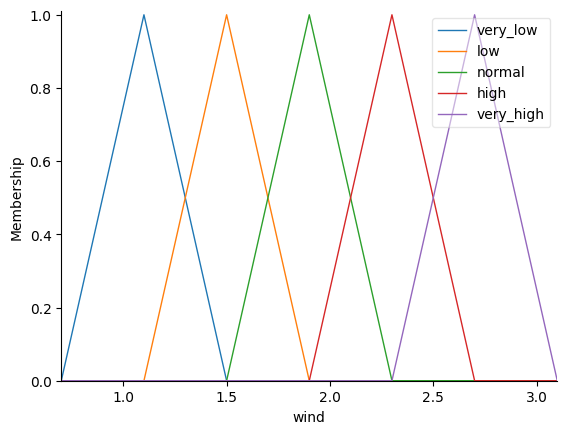

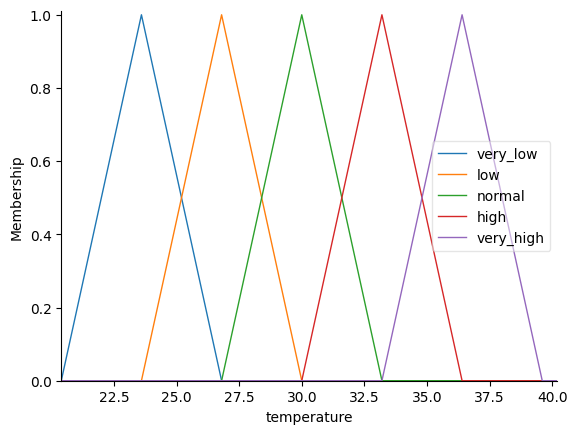

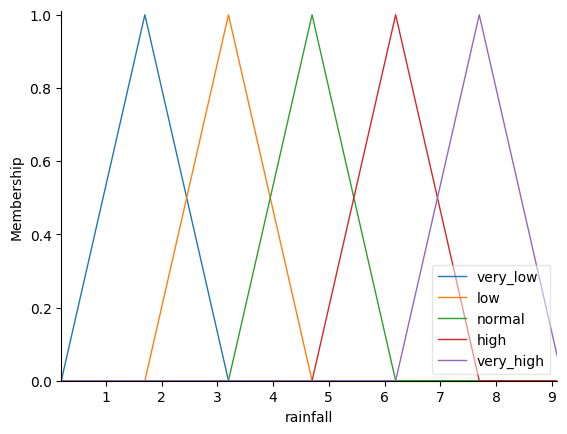

In [3]:
#VD2.1
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#input
wind=ctrl.Antecedent(np.arange(0.7 , 3.2 , 0.1),'wind')
temperature=ctrl.Antecedent(np.arange(20.4 , 40.3 , 0.1),'temperature')
#output
rainfall=ctrl.Consequent(np.arange(0.2 , 9.2 , 0.1),'rainfall')

#phân tích giá trị
#wind
wind['very_low']=fuzz.trimf(wind.universe,[0.7 , 1.1 , 1.5])
wind['low']=fuzz.trimf(wind.universe,[1.1 , 1.5 , 1.9])
wind['normal']=fuzz.trimf(wind.universe,[1.5 , 1.9 , 2.3])
wind['high']=fuzz.trimf(wind.universe,[1.9 , 2.3 , 2.7])
wind['very_high']=fuzz.trimf(wind.universe,[2.3 , 2.7 , 3.1])

#temperature
temperature['very_low'] = fuzz.trimf(temperature.universe,[20.4 , 23.6 , 26.8])
temperature['low'] = fuzz.trimf(temperature.universe,[23.6 , 26.8 , 30])
temperature['normal'] = fuzz.trimf(temperature.universe,[26.8, 30, 33.2])
temperature['high'] = fuzz.trimf(temperature.universe,[30 , 33.2 , 36.4])
temperature['very_high'] = fuzz.trimf(temperature.universe, [33.2 , 36.4 , 39.6])

#rainfall
rainfall['very_low'] = fuzz.trimf(rainfall.universe,[0.2 , 1.7, 3.2])
rainfall['low'] = fuzz.trimf(rainfall.universe,[1.7 , 3.2, 4.7])
rainfall['normal'] = fuzz.trimf(rainfall.universe,[3.2 , 4.7, 6.2])
rainfall['high'] = fuzz.trimf(rainfall.universe,[4.7 , 6.2, 7.7])
rainfall['very_high'] = fuzz.trimf(rainfall.universe,[6.2 , 7.7 , 9.2])
wind.view()
temperature.view()
rainfall.view()

Nguy cơ: 63.88888888888891 %


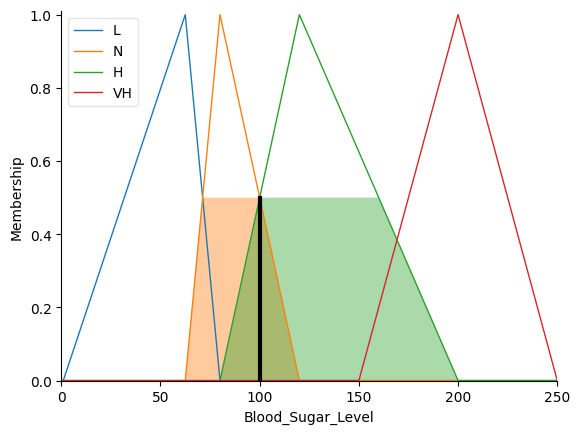

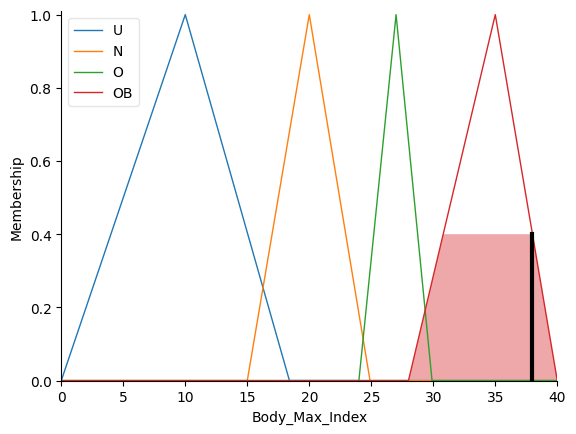

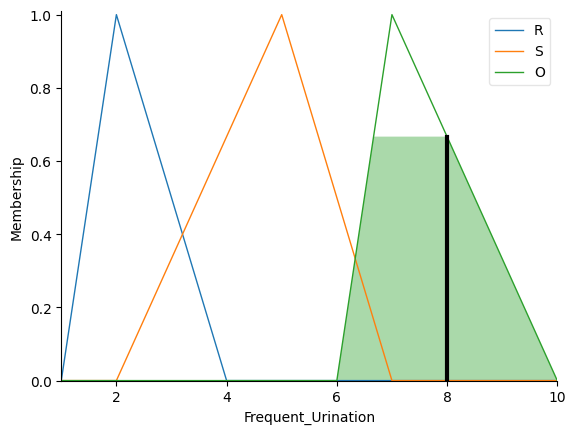

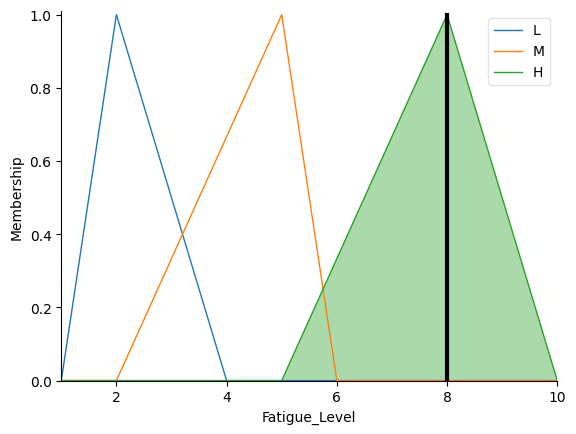

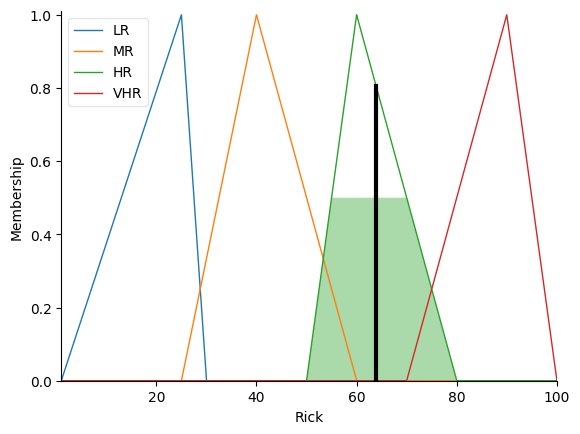

In [7]:
#VD2.2

#input
Blood_Sugar_Level=ctrl.Antecedent(np.arange(0 , 250.1 , 0.1),'Blood_Sugar_Level')
Body_Max_Index=ctrl.Antecedent(np.arange(0 , 40.1 , 0.1),'Body_Max_Index')
Frequent_Urination=ctrl.Antecedent(np.arange(1 , 10.1 , 0.1),'Frequent_Urination')
Fatigue_Level=ctrl.Antecedent(np.arange(1 , 10.1 , 0.1),'Fatigue_Level')

#output
Rick=ctrl.Consequent(np.arange(1 , 100.1 , 0.01),'Rick')

#phân tích giá trị

#mức đường
Blood_Sugar_Level['L']=fuzz.trimf(Blood_Sugar_Level.universe, [1 , 62.5 , 80])
Blood_Sugar_Level['N']=fuzz.trimf(Blood_Sugar_Level.universe, [62.5 , 80 , 120])
Blood_Sugar_Level['H']=fuzz.trimf(Blood_Sugar_Level.universe, [80 , 120 , 200])
Blood_Sugar_Level['VH']=fuzz.trimf(Blood_Sugar_Level.universe, [150 , 200 , 250])

#thể trạng cơ thể
Body_Max_Index['U']=fuzz.trimf(Body_Max_Index.universe, [0 , 10 , 18.4])
Body_Max_Index['N']=fuzz.trimf(Body_Max_Index.universe, [15 , 20 , 24.9])
Body_Max_Index['O']=fuzz.trimf(Body_Max_Index.universe, [24 , 27 , 29.9])
Body_Max_Index['OB']=fuzz.trimf(Body_Max_Index.universe, [28 , 35 , 40])

#tần suất đi vệ sinh
Frequent_Urination['R']=fuzz.trimf(Frequent_Urination.universe, [1 , 2 , 4])
Frequent_Urination['S']=fuzz.trimf(Frequent_Urination.universe, [2 , 5 , 7])
Frequent_Urination['O']=fuzz.trimf(Frequent_Urination.universe, [6 , 7 , 10])

#mức độ mệt mỏi
Fatigue_Level['L']=fuzz.trimf(Fatigue_Level.universe, [1 , 2 , 4])
Fatigue_Level['M']=fuzz.trimf(Fatigue_Level.universe, [2 , 5 , 6])
Fatigue_Level['H']=fuzz.trimf(Fatigue_Level.universe, [5 , 8 , 10])

#rủi ro
Rick['LR']=fuzz.trimf(Rick.universe, [1 , 25 , 30])
Rick['MR']=fuzz.trimf(Rick.universe, [25 , 40 , 60 ])
Rick['HR']=fuzz.trimf(Rick.universe, [50 , 60 , 80 ])
Rick['VHR']=fuzz.trimf(Rick.universe, [70 , 90 , 100 ])

#luật dựa trên đường trong máu và tần suất đi tiểu
rule1=ctrl.Rule(Blood_Sugar_Level['VH'] & Frequent_Urination['O'], Rick['VHR'])
rule2=ctrl.Rule(Blood_Sugar_Level['VH'] & Frequent_Urination['S'], Rick['HR'])
rule3=ctrl.Rule(Blood_Sugar_Level['H'] & Frequent_Urination['O'], Rick['HR'])
rule4=ctrl.Rule(Blood_Sugar_Level['N'] & Frequent_Urination['R'], Rick['LR'])

#luật dựa trên đường trong máu và BMI
rule5=ctrl.Rule(Blood_Sugar_Level['VH'] & Body_Max_Index['OB'], Rick['VHR'])
rule6=ctrl.Rule(Blood_Sugar_Level['VH'] & Body_Max_Index['O'], Rick['HR'])
rule7=ctrl.Rule(Blood_Sugar_Level['H'] & Body_Max_Index['O'], Rick['HR'])
rule8=ctrl.Rule(Blood_Sugar_Level['H'] & Body_Max_Index['O'], Rick['MR'])
rule9=ctrl.Rule(Blood_Sugar_Level['N'] & Body_Max_Index['N'], Rick['LR'])

#luật dựa trên đường trong máu và mệt mỏi
rule10=ctrl.Rule(Blood_Sugar_Level['VH'] & Fatigue_Level['H'], Rick['VHR'])
rule11=ctrl.Rule(Blood_Sugar_Level['H'] & Fatigue_Level['H'], Rick['HR'])
rule12=ctrl.Rule(Blood_Sugar_Level['H'] & Fatigue_Level['M'], Rick['MR'])
rule13=ctrl.Rule(Blood_Sugar_Level['N'] & Fatigue_Level['L'], Rick['LR'])
control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['Blood_Sugar_Level'] = 100
fuzzy_system.input['Body_Max_Index'] = 38
fuzzy_system.input['Frequent_Urination'] = 8
fuzzy_system.input['Fatigue_Level'] = 8

fuzzy_system.compute()


print(f"Nguy cơ: {fuzzy_system.output['Rick']}",'%')

Blood_Sugar_Level.view(sim=fuzzy_system)
Body_Max_Index.view(sim=fuzzy_system)
Frequent_Urination.view(sim=fuzzy_system)
Fatigue_Level.view(sim=fuzzy_system)
Rick.view(sim=fuzzy_system)

Final Price: 10.00 (Medium)


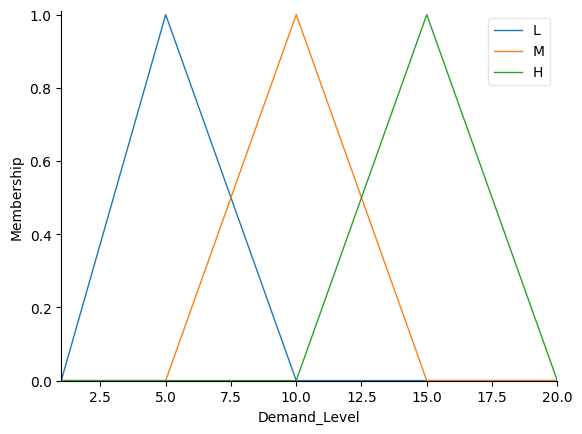

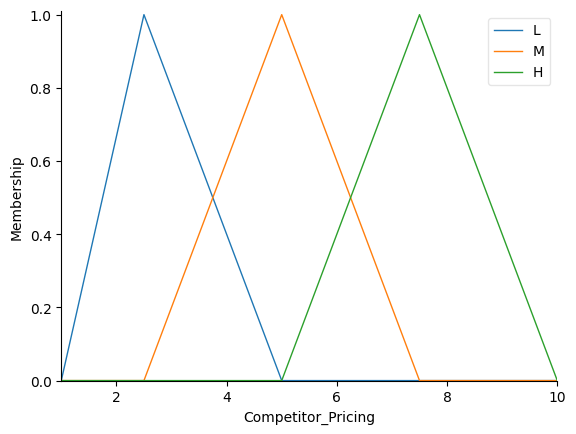

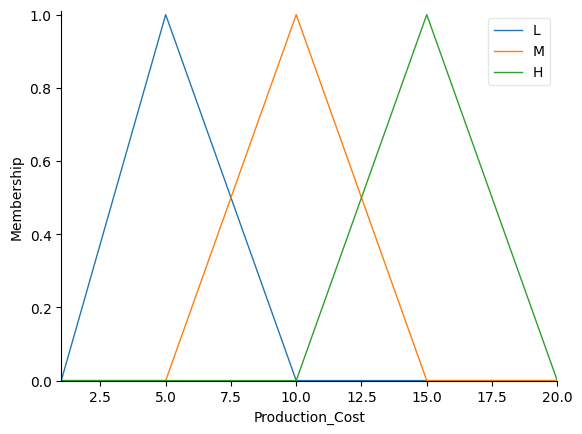

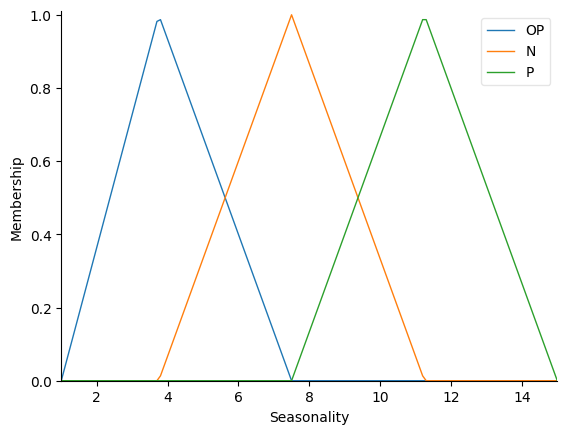

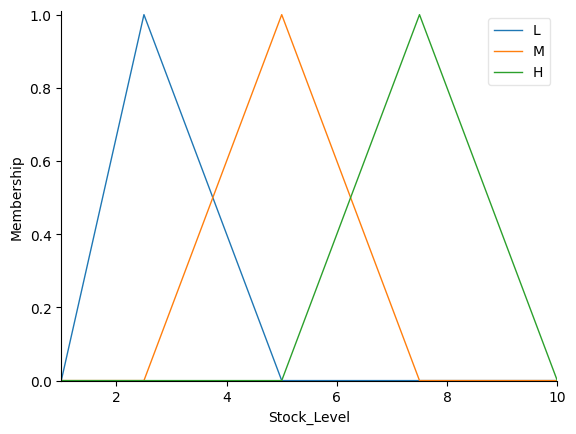

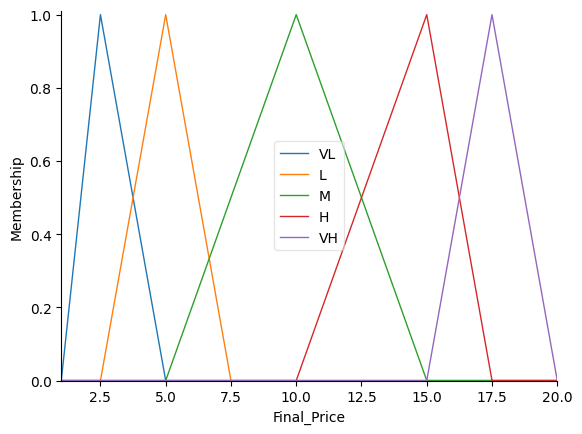

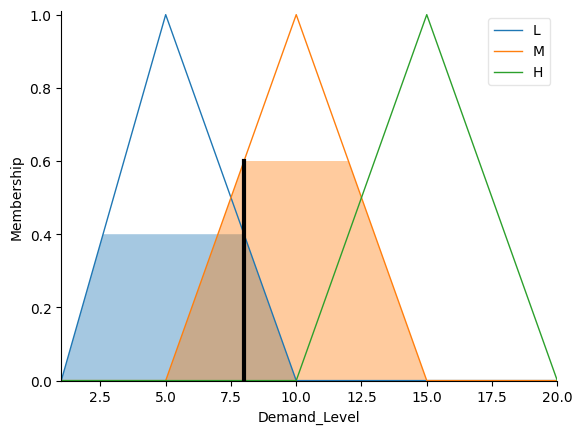

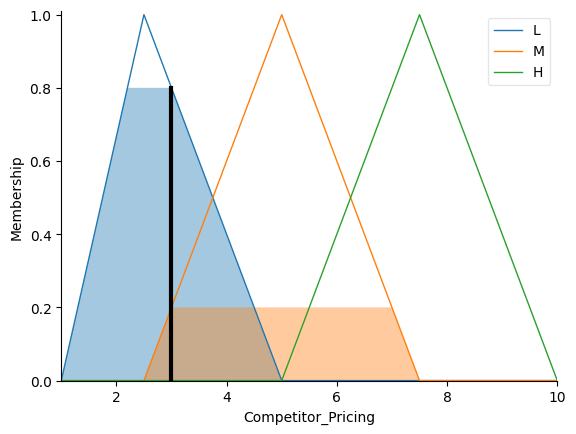

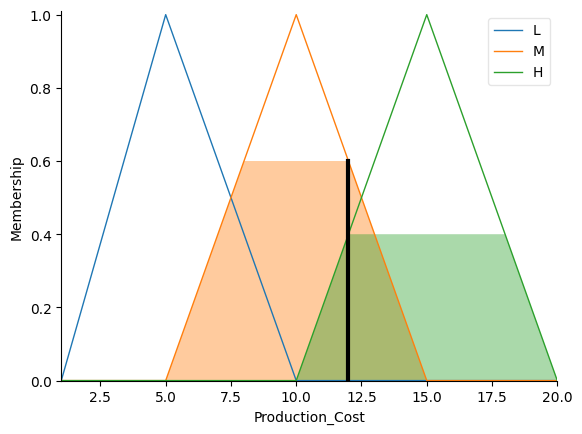

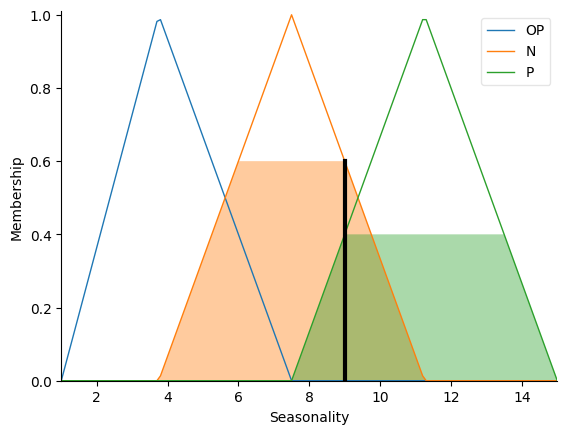

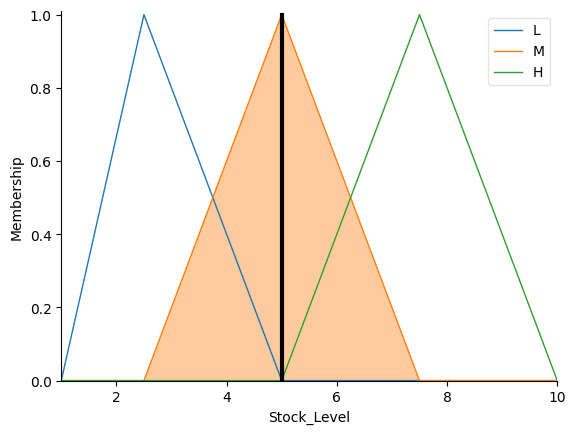

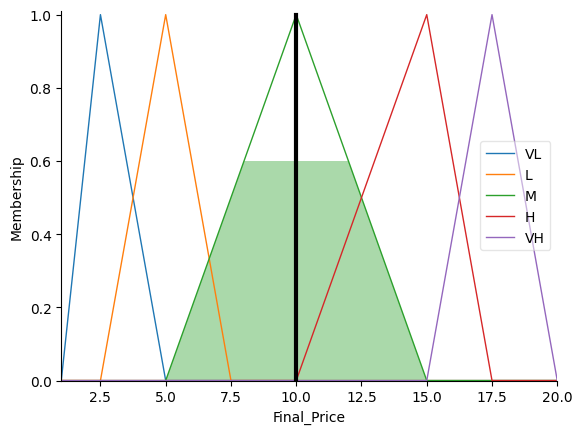

In [9]:
#VD2.3
#input
Demand_Level = ctrl.Antecedent(np.arange(1 , 20.1 , 0.1), 'Demand_Level')
Competitor_Pricing = ctrl.Antecedent(np.arange(1 , 10.1 , 0.1), 'Competitor_Pricing')
Production_Cost = ctrl.Antecedent(np.arange(1 , 20.1 , 0.1), 'Production_Cost')
Seasonality = ctrl.Antecedent(np.arange(1 , 15.1 , 0.1), 'Seasonality')
Stock_Level = ctrl.Antecedent(np.arange(1 , 10.1 , 0.1), "Stock_Level")

#output
Final_Price = ctrl.Consequent(np.arange(1 , 20.1 , 0.1), 'Final_Price')

#phân tích giá trị
Demand_Level['L'] = fuzz.trimf(Demand_Level.universe, [1 , 5 , 10])
Demand_Level['M'] = fuzz.trimf(Demand_Level.universe, [5 , 10 , 15])
Demand_Level['H'] = fuzz.trimf(Demand_Level.universe, [10 , 15 , 20])

Competitor_Pricing['L'] = fuzz.trimf(Competitor_Pricing.universe, [1 , 2.5 , 5])
Competitor_Pricing['M'] = fuzz.trimf(Competitor_Pricing.universe, [2.5 , 5 , 7.5])
Competitor_Pricing['H'] = fuzz.trimf(Competitor_Pricing.universe, [5 , 7.5 , 10])

Production_Cost['L'] = fuzz.trimf(Production_Cost.universe, [1 , 5 , 10])
Production_Cost['M'] = fuzz.trimf(Production_Cost.universe, [5 , 10 , 15])
Production_Cost['H'] = fuzz.trimf(Production_Cost.universe, [10 , 15 , 20])

Seasonality['OP'] = fuzz.trimf(Seasonality.universe, [1 , 3.75 , 7.5])
Seasonality['N'] = fuzz.trimf(Seasonality.universe, [3.75 , 7.5 , 11.25])
Seasonality['P'] = fuzz.trimf(Seasonality.universe, [7.5 , 11.25 , 15])

Stock_Level['L'] = fuzz.trimf(Stock_Level.universe, [1 , 2.5 , 5])
Stock_Level['M'] = fuzz.trimf(Stock_Level.universe, [2.5 , 5 , 7.5])
Stock_Level['H'] = fuzz.trimf(Stock_Level.universe, [5 , 7.5 , 10])

Final_Price['VL'] = fuzz.trimf(Final_Price.universe, [1 , 2.5 , 5])
Final_Price['L'] = fuzz.trimf(Final_Price.universe, [2.5 , 5 , 7.5])
Final_Price['M'] = fuzz.trimf(Final_Price.universe, [5 , 10 , 15])
Final_Price['H'] = fuzz.trimf(Final_Price.universe, [10 , 15 , 17.5])
Final_Price['VH'] = fuzz.trimf(Final_Price.universe, [15 , 17.5 , 20])

Demand_Level.view()
Competitor_Pricing.view()
Production_Cost.view()
Seasonality.view()
Stock_Level.view()
Final_Price.view()

#Rule

#Final_Price very high
rule1 = ctrl.Rule(Demand_Level['H'] & Competitor_Pricing['H'] & Stock_Level['L'], Final_Price['VH'])
rule2 = ctrl.Rule(Demand_Level['H'] & Seasonality['P'] & Stock_Level['L'], Final_Price['VH'])
rule3 = ctrl.Rule(Demand_Level['M'] & Production_Cost['H'] & Stock_Level['L'], Final_Price['VH'])

#Final_Price high
rule4 = ctrl.Rule(Demand_Level['H'] & Competitor_Pricing['M'] & Stock_Level['M'], Final_Price['H'])
rule5 = ctrl.Rule(Demand_Level['M'] & Competitor_Pricing['H'] & Stock_Level['L'], Final_Price['H'])
rule6 = ctrl.Rule(Demand_Level['H'] & Seasonality['P'] & Stock_Level['M'], Final_Price['H'])

#Final_Price medium
rule7 = ctrl.Rule(Demand_Level['M'] & Competitor_Pricing['M'] & Stock_Level['M'], Final_Price['M'])
rule8 = ctrl.Rule(Demand_Level['L'] & Competitor_Pricing['H'] & Stock_Level['M'], Final_Price['M'])
rule9 = ctrl.Rule(Demand_Level['M'] & Production_Cost['M'] & Stock_Level['M'], Final_Price['M'])

#Final_Price low
rule10 = ctrl.Rule(Demand_Level['L'] & Competitor_Pricing['L'] & Stock_Level['H'], Final_Price['L'])
rule11 = ctrl.Rule(Demand_Level['M'] & Production_Cost['L'] & Stock_Level['H'], Final_Price['L'])
rule12 = ctrl.Rule(Demand_Level['L'] & Seasonality['OP'] & Stock_Level['H'], Final_Price['L'])

#Final_Price very low
rule13 = ctrl.Rule(Demand_Level['L'] & Competitor_Pricing['L'] & Stock_Level['H'], Final_Price['VL'])
rule14 = ctrl.Rule(Demand_Level['L'] & Seasonality['OP'] & Stock_Level['H'], Final_Price['VL'])
rule15 = ctrl.Rule(Demand_Level['M'] & Production_Cost['L'] & Stock_Level['H'], Final_Price['VL'])
rule16 = ctrl.Rule(Demand_Level['M'] & Competitor_Pricing['L'] & Stock_Level['H'], Final_Price['VL'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['Demand_Level'] = 8
fuzzy_system.input['Competitor_Pricing'] = 3
fuzzy_system.input['Production_Cost'] = 12
fuzzy_system.input['Seasonality'] = 9
fuzzy_system.input['Stock_Level'] = 5

fuzzy_system.compute()

final_price = fuzzy_system.output['Final_Price']

if final_price <= 3:
    price_category = "Very Low"
elif 3 < final_price <= 7:
    price_category = "Low"
elif 7 < final_price <= 12:
    price_category = "Medium"
elif 12 < final_price <= 16:
    price_category = "High"
else:
    price_category = "Very High"

print(f"Final Price: {final_price:.2f} ({price_category})")


Demand_Level.view(sim = fuzzy_system)
Competitor_Pricing.view(sim = fuzzy_system)
Production_Cost.view(sim = fuzzy_system)
Seasonality.view(sim = fuzzy_system)
Stock_Level.view(sim = fuzzy_system)
Final_Price.view(sim = fuzzy_system)

Thời gian giặt: 40.67810457516356 phút 
Lượng nước: 23.92469996128529 lít 


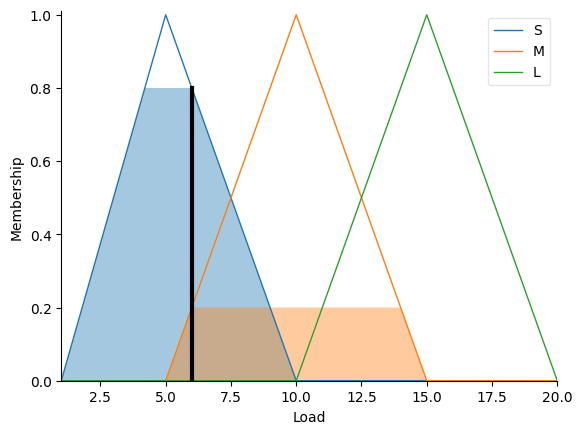

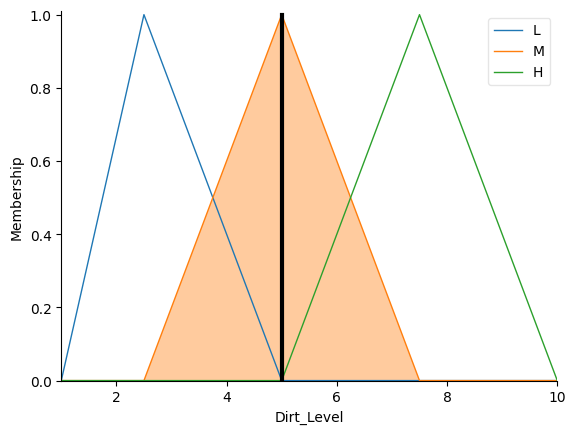

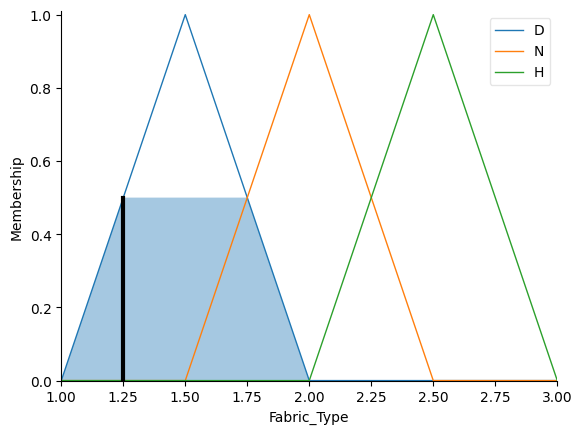

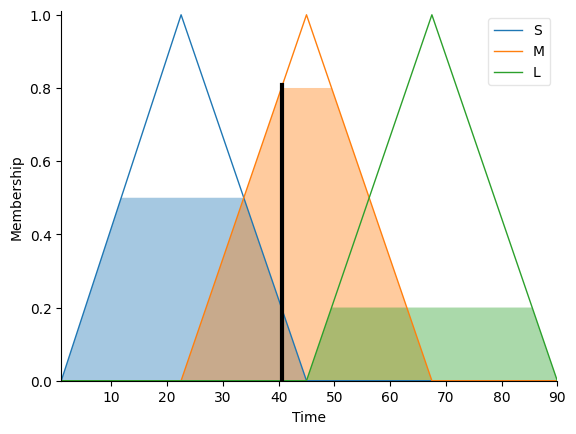

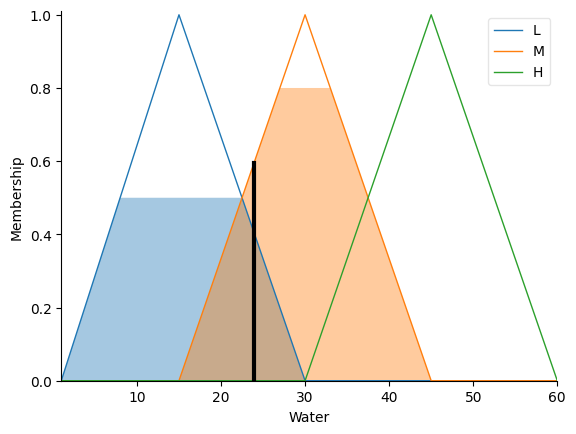

In [10]:
#VD 2.4
#input
Load=ctrl.Antecedent(np.arange(1, 20.1, 0.1), 'Load')
Dirt_Level=ctrl.Antecedent(np.arange(1, 10.1, 0.1), 'Dirt_Level')
Fabric_Type=ctrl.Antecedent(np.arange(1, 3.1, 0.1), 'Fabric_Type')

#output
Time=ctrl.Consequent(np.arange(1, 90.1, 0.1), 'Time')
Water=ctrl.Consequent(np.arange(1, 60.1, 0.1), 'Water')

#phân tích giá trị
Load['S'] = fuzz.trimf(Load.universe, [1, 5, 10])
Load['M'] = fuzz.trimf(Load.universe, [5, 10, 15])
Load['L'] = fuzz.trimf(Load.universe, [10, 15, 20])

Dirt_Level['L'] = fuzz.trimf(Dirt_Level.universe, [1, 2.5, 5])
Dirt_Level['M'] = fuzz.trimf(Dirt_Level.universe, [2.5, 5, 7.5])
Dirt_Level['H'] = fuzz.trimf(Dirt_Level.universe, [5, 7.5, 10])

Fabric_Type['D'] = fuzz.trimf(Fabric_Type.universe, [1, 1.5, 2])
Fabric_Type['N'] = fuzz.trimf(Fabric_Type.universe, [1.5, 2, 2.5])
Fabric_Type['H'] = fuzz.trimf(Fabric_Type.universe, [2, 2.5, 3])

Time['S'] = fuzz.trimf(Time.universe, [1, 22.5, 45])
Time['M'] = fuzz.trimf(Time.universe, [22.5, 45, 67.5])
Time['L'] = fuzz.trimf(Time.universe, [45, 67.5, 90])

Water['L'] = fuzz.trimf(Water.universe, [1, 15, 30])
Water['M'] = fuzz.trimf(Water.universe, [15, 30, 45])
Water['H'] = fuzz.trimf(Water.universe, [30, 45, 60])

#rule
#luật dựa vào số kg đồ và độ bẩn
rule1 = ctrl.Rule(Load['S'] & Dirt_Level['L'], (Time['S'] , Water['L']), label='rule1')
rule2 = ctrl.Rule(Load['S'] & Dirt_Level['M'], (Time['M'] , Water['M']), label='rule2')
rule3 = ctrl.Rule(Load['S'] & Dirt_Level['H'], (Time['L'], Water['M']), label="rule3")
rule4 = ctrl.Rule(Load['M'] & Dirt_Level['L'], (Time['M'] , Water['M']), label='rule4')
rule5 = ctrl.Rule(Load['M'] & Dirt_Level['M'], (Time['L'], Water['M']), label="rule5")
rule6 = ctrl.Rule(Load['M'] & Dirt_Level['H'], (Time['L'], Water['M']), label="rule6")
rule7 = ctrl.Rule(Load['L'] & Dirt_Level['L'], (Time['M'], Water['H']), label="rule7")
rule8 = ctrl.Rule(Load['L'] & Dirt_Level['M'], (Time['L'], Water['M']), label="rule8")
rule9 = ctrl.Rule(Load['L'] & Dirt_Level['H'], (Time['L'], Water['M']), label="rule9")
rule10 = ctrl.Rule(Load['L'] & Dirt_Level['H'], (Time['L'], Water['H']), label="rule10")

#luật dựa trên loại vải
rule11 = ctrl.Rule(Fabric_Type['D'], (Time['S'] , Water['L']), label='rule11')
#rule12 = ctrl.Rule(Fabric_Type['N'], Time() & Water()) bỏ qua quy tắc này
rule13 = ctrl.Rule(Fabric_Type['H'], (Time['L'], Water['H']), label="rule13")


#luật kết hợp các yếu tố
rule14 = ctrl.Rule(Load['L'] & Dirt_Level['H'] & Fabric_Type['H'], (Time['L'], Water['H']), label="rule14")
rule15 = ctrl.Rule(Load['S'] & Dirt_Level['L'] & Fabric_Type['D'], (Time['S'] , Water['L']), label='rule15')
rule16 = ctrl.Rule(Load['M'] & Dirt_Level['M'] & Fabric_Type['N'], (Time['M'] , Water['M']), label='rule16')
control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule13, rule14, rule15,rule16])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['Load'] = 6
fuzzy_system.input['Dirt_Level'] = 5
fuzzy_system.input['Fabric_Type'] = 1.25

fuzzy_system.compute()

print(f"Thời gian giặt: {fuzzy_system.output['Time']} phút ")

print(f"Lượng nước: {fuzzy_system.output['Water']} lít ")

Load.view(sim=fuzzy_system)
Dirt_Level.view(sim=fuzzy_system)
Fabric_Type.view(sim=fuzzy_system)
Time.view(sim=fuzzy_system)
Water.view(sim=fuzzy_system)

Tốc độ quạt: 0.9249999999999998 
Mức độ làm mát: 1.485000000000001 


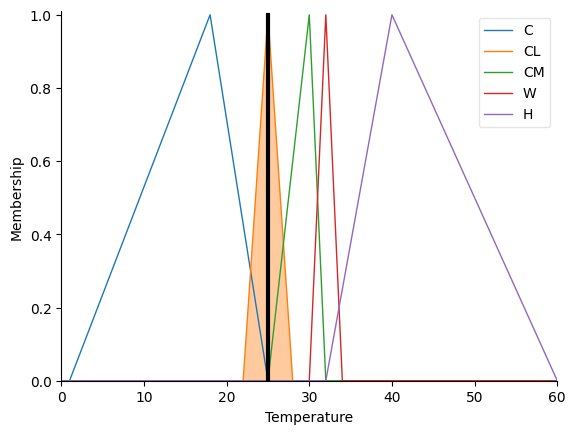

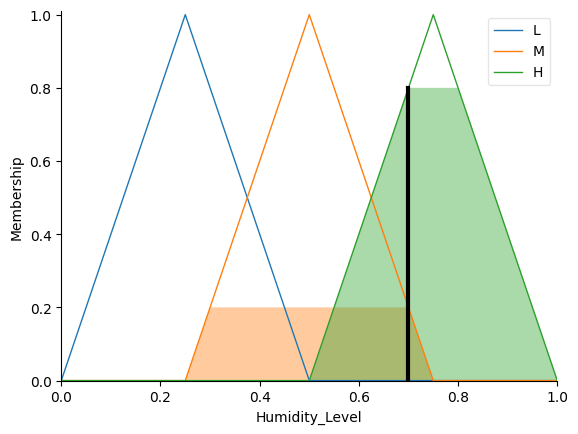

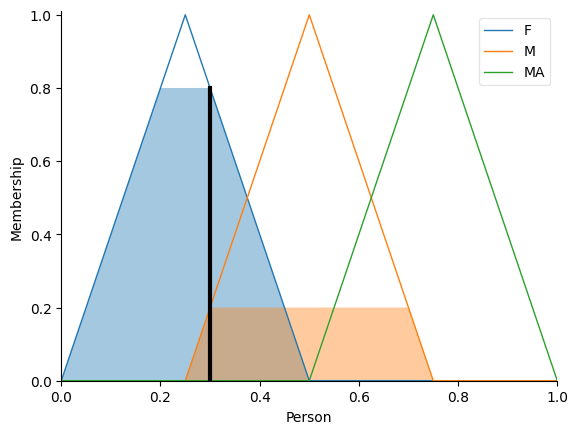

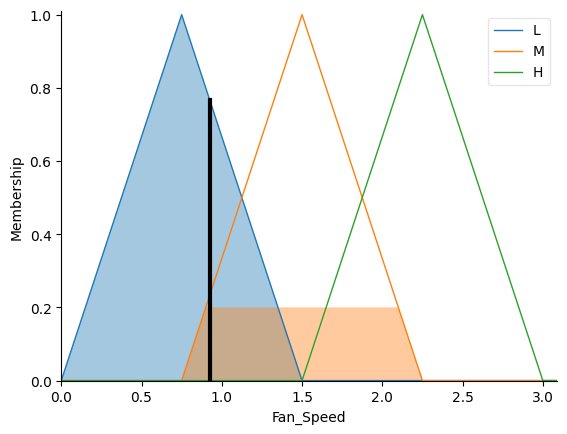

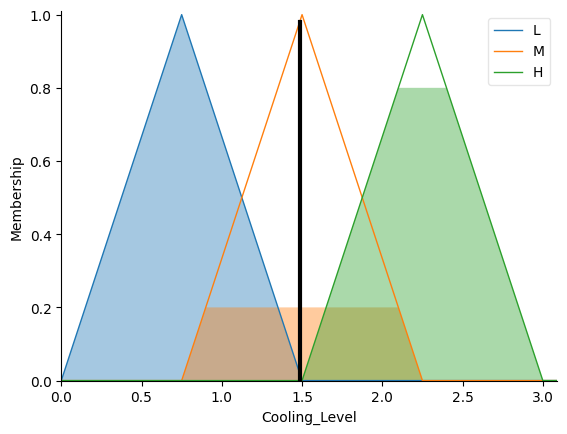

In [11]:
#vd2.5

#input
Temperature = ctrl.Antecedent(np.arange(0, 60.1, 0.1), 'Temperature')
Humidity_Level = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'Humidity_Level')
Person = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'Person')

#output
Fan_Speed = ctrl.Consequent(np.arange(0, 3.1, 0.01), 'Fan_Speed')
Cooling_Level = ctrl.Consequent(np.arange(0, 3.1, 0.01), 'Cooling_Level')

#phân tích giá trị
Temperature['C'] = fuzz.trimf(Temperature.universe, [1, 18, 25])
Temperature['CL'] = fuzz.trimf(Temperature.universe, [22, 25, 28])
Temperature['CM'] = fuzz.trimf(Temperature.universe, [25, 30, 32])
Temperature['W'] = fuzz.trimf(Temperature.universe, [30, 32, 34])
Temperature['H'] = fuzz.trimf(Temperature.universe, [32, 40, 60])

Humidity_Level['L'] = fuzz.trimf(Humidity_Level.universe, [0, 0.25, 0.5])
Humidity_Level['M'] = fuzz.trimf(Humidity_Level.universe, [0.25, 0.5, 0.75])
Humidity_Level['H'] = fuzz.trimf(Humidity_Level.universe, [0.5, 0.75, 1])

Person['F'] = fuzz.trimf(Person.universe, [0, 0.25, 0.5])
Person['M'] = fuzz.trimf(Person.universe, [0.25, 0.5, 0.75])
Person['MA'] = fuzz.trimf(Person.universe, [0.5, 0.75, 1])

Fan_Speed['L'] = fuzz.trimf(Fan_Speed.universe, [0, 0.75, 1.5])
Fan_Speed['M'] = fuzz.trimf(Fan_Speed.universe, [0.75, 1.5, 2.25])
Fan_Speed['H'] = fuzz.trimf(Fan_Speed.universe, [1.5, 2.25, 3])

Cooling_Level['L'] = fuzz.trimf(Cooling_Level.universe, [0, 0.75, 1.5])
Cooling_Level['M'] = fuzz.trimf(Cooling_Level.universe, [0.75, 1.5, 2.25])
Cooling_Level['H'] = fuzz.trimf(Cooling_Level.universe, [1.5, 2.25, 3])

#Rule

#dựa trên nhiệt độ phòng và tốc độ quạt
rule1 = ctrl.Rule(Temperature['C'], Fan_Speed['L'])
rule2 = ctrl.Rule(Temperature['CL'], Fan_Speed['L'])
rule3 = ctrl.Rule(Temperature['CM'], Fan_Speed['M'])
rule4 = ctrl.Rule(Temperature['W'], Fan_Speed['H'])
rule5 = ctrl.Rule(Temperature['H'], Fan_Speed['H'])

#dựa trên nhiệt độ phòng và mức độ làm mát
rule6 = ctrl.Rule(Temperature['C'], Cooling_Level['L'])
rule7 = ctrl.Rule(Temperature['CL'], Cooling_Level['L'])
rule8 = ctrl.Rule(Temperature['CM'], Cooling_Level['M'])
rule9 = ctrl.Rule(Temperature['W'], Cooling_Level['H'])
rule10 = ctrl.Rule(Temperature['H'], Cooling_Level['H'])

#dựa trên độ ẩm và mức độ làm mát
rule11 = ctrl.Rule(Humidity_Level['L'], Cooling_Level['L'])
rule12 = ctrl.Rule(Humidity_Level['M'], Cooling_Level['M'])
rule13 = ctrl.Rule(Humidity_Level['H'], Cooling_Level['H'])

#dựa trên số người và tốc độ quạt
rule14 = ctrl.Rule(Person['F'], Fan_Speed['L'])
rule15 = ctrl.Rule(Person['M'], Fan_Speed['M'])
rule16 = ctrl.Rule(Person['MA'], Fan_Speed['H'])

#kết hợp các yếu tố
rule17 = ctrl.Rule(Temperature['H'] & Humidity_Level['H'] & Person['MA'], (Fan_Speed['H'], Cooling_Level['H']))
rule18 = ctrl.Rule(Temperature['CM'] & Humidity_Level['M'] & Person['M'], (Fan_Speed['M'], Cooling_Level['M']))
rule19 = ctrl.Rule(Temperature['CL'] & Humidity_Level['L'] & Person['F'], (Fan_Speed['L'], Cooling_Level['L']))
control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15,rule16,rule17,rule18,rule19])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['Temperature'] = 25
fuzzy_system.input['Humidity_Level'] = 0.7
fuzzy_system.input['Person'] = 0.3

fuzzy_system.compute()

print(f"Tốc độ quạt: {fuzzy_system.output['Fan_Speed']} ")

print(f"Mức độ làm mát: {fuzzy_system.output['Cooling_Level']} ")

Temperature.view(sim=fuzzy_system)
Humidity_Level.view(sim=fuzzy_system)
Person.view(sim=fuzzy_system)
Fan_Speed.view(sim=fuzzy_system)
Cooling_Level.view(sim=fuzzy_system)